<a href="https://colab.research.google.com/github/momorulezz/STA-4032-Portfolio/blob/main/Lab%2010%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage

In [ ]:
!pip install wandb
import wandb as wb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.8/266.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.3 MB/s eta 0:00:00


In [ ]:
def plot(x):
  #This line checks if the type of the input x is a PyTorch Tensor. PyTorch is a popular library for deep learning that uses tensors to represent data, similar to NumPy arrays but with additional functionality, such as GPU support.
    if type(x) == torch.Tensor :
      #if x is a tensor, its moved to the CPU and converted into a NumPy array
        x = x.cpu().detach().numpy()
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

In [ ]:
def montage_plot(x):
  #applies padding to input array x. Pad_width argument specifies how much padding to add around array. pad_width defined as a tuple of tuples; nnno padding first, 1 pixel padding both sides 2nd and 3rd dimensions. Filled with zeros, indicating padding is constant
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
b = 1000

def get_batch(mode):
  #parameter to specify mode of operation, can be either "train" or "test"
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y


## MNIST
    

### Load Data

In [ ]:
# #MNIST
#./data; path where dataset should be downloaded + stored
#train=true; specifies the trainign set should be loaded. Setting this to false would  load test set
train_set = MNIST('./data', train=True, download=True)
test_set  = MNIST('./data', train=False, download=True)

#KMNIST
# train_set = KMNIST('./data', train=True, download=True)
# test_set =  KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = FashionMNIST('./data', train=True, download=True)
# test_set =  FashionMNIST('./data', train=False, download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 9912422/9912422 [00:00<00:00, 10570540.40it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 1787716.85it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 1648877/1648877 [00:00<00:00, 13847569.02it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7931111.06it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape

(60000, 1, 28, 28)

In [ ]:
Y[50000]

3

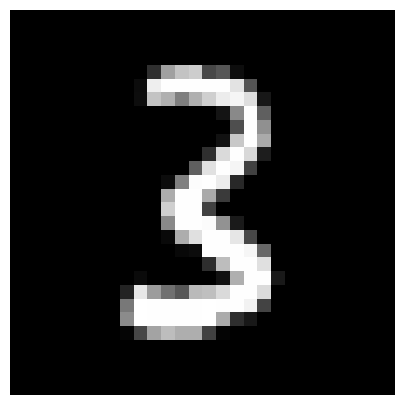

In [ ]:
plot(X[50000,0,:,:])

In [ ]:
Y[100]

5

In [ ]:
X.shape

(60000, 1, 28, 28)

In [ ]:
X[0:25,0,:,:].shape

(25, 28, 28)

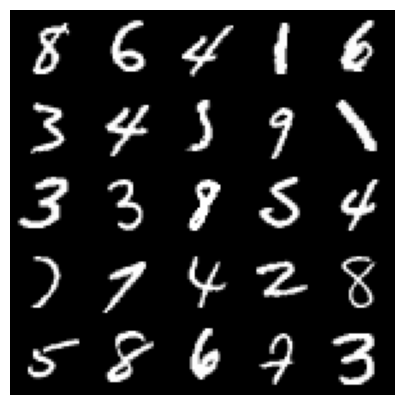

In [ ]:
montage_plot(X[125:150,0,:,:])

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape

(10000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]

10000

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
# I have AMD Driver; was unable to run ths as i got a runtime error for not being able to find an NVIDIA driver in my system.
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [ ]:
X.shape


### Classifier


In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

In [ ]:
plot(x[0].reshape(28,28))

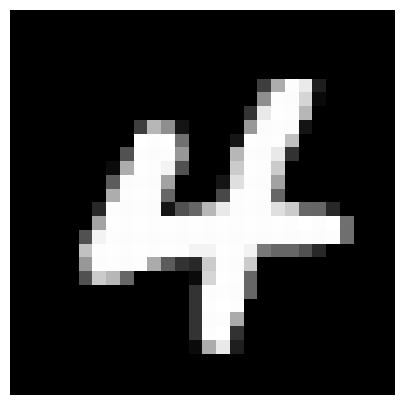

In [ ]:
plot(x[1].reshape(28,28))

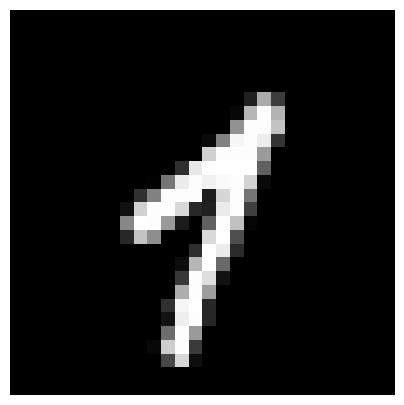

In [ ]:
plot(x[2].reshape(28,28))

In [ ]:
y[:10]

array([2, 4, 1, 5, 4, 6, 4, 7, 4, 8])

In [ ]:
#I have AMD driver and GPU.
W = GPU(np.random.randn(784,10))

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
x.shape, W.shape

NameError: name 'W' is not defined

In [ ]:
torch.matmul(x,W).shape

In [ ]:
(x@W).shape

In [ ]:
%%timeit
x@W

In [ ]:
x@W

In [ ]:
y2 = x@W

In [ ]:
plot(y2[:50])

In [ ]:
y

In [ ]:
y.shape

In [ ]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [ ]:
one_hot(y)

In [ ]:
# a PyTorch function used to find the indices of the maximum values along a specified dimension of a tensor. It is commonly used in classification tasks to determine the predicted class by identifying the output neuron with the highest activation (i.e., the highest value).
torch.argmax(y2,1)

In [ ]:
# calculates the model's accuracy for a given batch of data by determining the proportion of instances for which the model's predicted class matches the true class. The result is a scalar value representing the accuracy, which can range from 0 (no correct predictions) to 1 (all predictions correct).
torch.sum(y == torch.argmax(y2,1))/b

In [ ]:
X.shape

In [ ]:
X@W

In [ ]:
torch.argmax(X@W,1)

In [ ]:
Y

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

In [ ]:
X@W

NameError: name 'W' is not defined

In [ ]:
W.shape

In [ ]:
W[:,0].shape

In [ ]:
plot(W[:,0].reshape(28,28))

In [ ]:
plot(W[:,2].reshape(28,28))

In [ ]:
W.shape

In [ ]:
(W.T).shape

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
# The result of this operation is the average cross-entropy loss for the batch, which measures how well the predicted probabilities match the actual class labels. A lower cross-entropy loss indicates a better model performance.
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [ ]:
def acc(out,y):
    return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
#performs a manual update of the first weight tensor in w using gradient descent and then resets its gradient. This approach gives you fine control over the optimization process
def gradient_step(w):

    w[0].data = w[0].data - c.L*w[0].grad.data

    w[0].grad.data.zero_()

In [ ]:
def make_plots():

    acc_train = acc(model(x,w),y)

    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [ ]:
#designed to manually perform a single step of gradient descent on a weight tensor w belonging to a model, neural network, or any computational graph
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
for run in range(3):

    wb.init(project="Simple_Linear_SGD_123");
    c = wb.config

    c.L = 0.1
    c.b = 1024
    c.epochs = 10000

    w = [GPU(Truncated_Normal((784,10)))]

    for i in range(c.epochs):

        x,y = get_batch('train')

        out = model(x,w)

        loss = cross_entropy(softmax(out),y)

        loss.backward()

        gradient_step(w)

        make_plots()

        if (i+1) % 10000 == 0: montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
# represents a loop that executes a simple training routine for a linear model using Stochastic Gradient Descent (SGD) with manual gradient updates and loss calculation.
for run in range(100):

    wb.init(project="Simple_Linear_Adam_2");
    c = wb.config

    c.L = 0.01
    c.b = 1024
    c.epochs = 100000

    w = [GPU(Truncated_Normal((784,10)))]

    optimizer = torch.optim.Adam(w, lr=c.L)

    for i in range(c.epochs):

        x,y = get_batch('train')

        loss = cross_entropy(softmax(model(x,w)),y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        wb.log({"loss": loss})

        make_plots()

        if i % 10000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())


### Autoencoder


In [ ]:
#typically used within a training or evaluation loop, where at each iteration, a new batch of data is required for processing. By randomly selecting batches, the function facilitates mini-batch gradient descent and helps to ensure that the model is exposed to a diverse set of samples across epochs, potentially improving generalization.
def get_batch(mode):
    b = 1024
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
X = X.reshape(X.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)

In [ ]:
import torchvision
from torch.nn.functional import *

In [ ]:
X = torchvision.transforms.functional.normalize(X,0.5,0.5)
X_test = torchvision.transforms.functional.normalize(X_test,0.5,0.5)

TypeError: img should be Tensor Image. Got <class 'numpy.ndarray'>

In [ ]:
#encoder consists of convolutional layers followed by a fully connected linear layer.
def Encoder(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    return x

In [ ]:
#his decoder consists of a linear layer followed by convolutional transpose layers, which are commonly used for upsampling in generative models like autoencoders and generative adversarial networks (GANs).
def Decoder(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)

In [ ]:
num_steps = 1000
batch_size = 512
learning_rate = 1e-3

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
#NO NVIDIA GPU
#Encode
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((10,6272)))
#Decode
w3 = GPU(randn_trunc((6272,10)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

optimizer = torch.optim.Adam(params=w, lr=learning_rate)

for i in range(num_steps):
#The training process iterates num_steps times, representing the number of updates to the model weights.
    x_real,y = get_batch('train')
#A batch of real images x_real and their labels y are retrieved for training. Only x_real is used since this is an unsupervised learning task focused on reconstructing inputs.
    x_fake = Autoencoder(x_real,w)
#The autoencoder model is applied to the real images to generate reconstructed (or "fake") images x_fake. The model uses the current weights w.
    loss = torch.mean((x_fake - x_real)**2)
#The loss is calculated as the mean squared error (MSE) between the real images and their reconstructions. This loss function encourages the autoencoder to produce outputs similar to the inputs.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
#Standard optimization steps in PyTorch: gradients are zeroed, the loss is backpropagated to compute gradients, and the optimizer updates the model weights based on these gradients.
    if i % 100 == 0: print(loss.item())

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
image_batch,y = get_batch('test')

In [ ]:
image_batch_recon = Autoencoder(image_batch,w)

NameError: name 'w' is not defined

In [ ]:
torch.mean((image_batch_recon - image_batch)**2)

NameError: name 'image_batch_recon' is not defined

In [ ]:
montage_plot(image_batch[0:25,0,:,:].cpu().detach().numpy())

In [ ]:
montage_plot(image_batch_recon[0:25,0,:,:].cpu().detach().numpy())


### Generator



In [ ]:
latent_size = 64
hidden_size = 256
image_size = 784
b = 1024

In [ ]:
#MNIST
# train_set = MNIST('./data', train=True, download=True)
# test_set = MNIST('./data', train=False, download=True)

#KMNIST
#train_set = KMNIST('./data', train=True, download=True)
#test_set = KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = FashionMNIST('./data', train=True, download=True)
test_set = FashionMNIST('./data', train=False, download=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 16339959.61it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 304837.67it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5510409.05it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18874368.00it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
#pre-processing prepares the data for input into a neural network by ensuring it is in the correct shape and has been normalized and standardized
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [ ]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((6000, 1, 28, 28), (60000,), (1000, 1, 28, 28), (10000,))

In [ ]:
X = GPU_data(X)
X_test = GPU_data(X_test)
Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

In [ ]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [ ]:
#D
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((1,6272)))
#G
w3 = GPU(randn_trunc((6272,64)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

In [ ]:
def D(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    x = torch.sigmoid(x)
    return x

In [ ]:
def G(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
b = 1024

In [ ]:
batch_size = b

In [ ]:
batch_size

In [ ]:
d_optimizer = torch.optim.Adam(w[0:3], lr=0.0002)
#This initializes an Adam optimizer for the discriminator's parameters. The slice w[0:3] selects the first three tensors from the list w, which correspond to the discriminator's weights.
g_optimizer = torch.optim.Adam(w[3:], lr=0.0002)
#The slice w[3:] selects the tensors from the fourth position onwards in the list w, corresponding to the generator's weights.
real_labels = (torch.ones(batch_size, 1).cuda())
fake_labels = (torch.zeros(batch_size, 1).cuda())

In [ ]:
num_epochs = 500
batches = X.shape[0]//batch_size
steps = num_epochs*batches

In [ ]:
z1 = (torch.randn(steps,batch_size,latent_size).cuda())
z2 = (torch.randn(steps,batch_size,latent_size).cuda())

In [ ]:
#This loop encapsulates the core training process for a GAN, with the discriminator learning to distinguish real from fake images and the generator improving in its ability to create realistic images.
for i in range(steps):

    images,y = get_batch('train')

    d_loss = binary_cross_entropy(D(images,w), real_labels) + binary_cross_entropy(D(G(z1[i],w),w), fake_labels)
    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()


    g_loss = binary_cross_entropy(D(G(z2[i],w),w), real_labels)
    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()


    if i % 200 == 0:
        out = G(z1[np.random.randint(steps)],w)
        montage_plot(out.view(batch_size,1,28,28).detach().cpu().numpy()[0:25,0,:,:])

In [ ]:
z1[np.random.randint(steps)].shape

In [ ]:
noise = GPU_data(torch.randn(1,64))

In [ ]:
output = G(noise,w)

In [ ]:
output.shape

In [ ]:
plot(output[0,0])